# Our own 1-layer NNet + TensorFlow

(Marco will elaborate on this in the future)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

import os, os.path, gzip, tempfile, urllib.request

def load_mnist(kind='train', dataset='zalando'): # 'train' or 't10k'
    """based on https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py"""

    if dataset=='zalando':
        url_base = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/'
    else:
        url_base = 'http://yann.lecun.com/exdb/mnist/'

    url_labels = url_base+'%s-labels-idx1-ubyte.gz'%kind
    url_images = url_base+'%s-images-idx3-ubyte.gz'%kind

    file_labels = os.path.join(tempfile.gettempdir(), '%s-labels-idx1-ubyte.gz'%kind)
    file_images = os.path.join(tempfile.gettempdir(), '%s-images-idx3-ubyte.gz'%kind)

    if not os.path.exists(file_labels):
        urllib.request.urlretrieve(url_labels, file_labels)

    if not os.path.exists(file_images):
        urllib.request.urlretrieve(url_images, file_images)

    with gzip.open(file_labels, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(file_images, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    assert len(images.shape)==2
    assert len(labels.shape)==1
    assert images.shape[0] == labels.shape[0]
    assert images.shape[1] == 28*28
    return images, labels

/Users/falkvandermeirsch/Documents/DSR/env/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

In [3]:
X_train, Y_train = load_mnist('train')
X_test, Y_test = load_mnist('t10k')


In [4]:
X_train.shape

(60000, 784)

In [5]:
# each row represents an image of 28*28 = 784 px
# X_train[0,:].reshape(28,28)

In [6]:
np.percentile(X_train[0,:].reshape(28,28), [0, 25, 50, 75, 100])

array([  0.,   0.,  44., 210., 255.])

In [7]:
# scale brightness from {0..255} -> [0, 1]
X_train = X_train / 255
X_test = X_test / 255

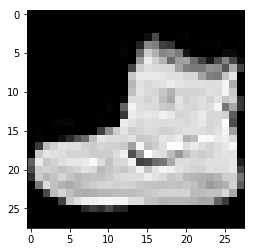

In [8]:
plt.imshow(X_train[0,:].reshape(28,28), cmap='gray')
plt.show()

In [9]:
Y_train[0]

9

In [10]:
label_dict[Y_train[0]]

'Ankle boot'

In [11]:
Y_train.shape

(60000,)

In [12]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
X_test.shape

(10000, 784)

In [14]:
Y_train[5]

2

# 3 ways to do one-hot-encoding

In [15]:
def one_hot_encode1(Y):
    Y_enc = np.zeros((Y.shape[0], 10))
    for row, index in zip(Y_enc, Y):
        row[index] = 1
    return Y_enc

In [16]:
def one_hot_encode2(Y):
    Y_enc = np.zeros((Y.shape[0], 10))
    Y_enc[np.arange(Y.shape[0]), Y] = 1
    return Y_enc  

In [17]:
def one_hot_encode3(Y):
    k = np.max(Y)+1
    return np.eye(k)[Y,:] 
# np.eye is the I-matrix of size k, we take the columns found in the Y vector to create the matrix

In [18]:
def one_hot_decode(Y_enc):
    return np.argmax(Y_enc, axis=1)

# K-nearest neighbour classifier

In [19]:
import sklearn.neighbors
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
X_test_subset = X_test[:100,]
Y_test_subset = Y_test[:100,]

Y_pred = knn.predict(X_test_subset)

In [20]:
Y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 7,
       7, 9, 1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 6, 7, 5, 7, 9, 0, 1, 6, 9,
       6, 7, 2, 1, 2, 6, 4, 2, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
       6, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 2, 5, 3, 6, 7, 1, 8, 0, 1, 2, 2], dtype=uint8)

In [21]:
Y_test_subset

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
       2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2], dtype=uint8)

In [22]:
np.mean(Y_pred == Y_test_subset)

0.85

In [24]:
import sklearn.metrics
sklearn.metrics.accuracy_score(Y_pred, Y_test_subset)

0.85

In [26]:
print(sklearn.metrics.classification_report(Y_pred, Y_test_subset))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       1.00      1.00      1.00        13
           2       0.86      0.71      0.77        17
           3       0.78      1.00      0.88         7
           4       0.60      0.86      0.71         7
           5       0.89      0.89      0.89         9
           6       0.75      0.60      0.67        10
           7       0.82      0.82      0.82        11
           8       1.00      1.00      1.00        12
           9       0.83      0.83      0.83         6

   micro avg       0.85      0.85      0.85       100
   macro avg       0.84      0.86      0.84       100
weighted avg       0.86      0.85      0.85       100



## Let's now implement it ourself

In [ ]:
# let's take a smaller subset to minimize computing time
X_train_subset = X_test[:6000,]
Y_train_subset = Y_test[:6000,]

In [50]:
# my solution

from scipy.spatial import distance

def knn(X_train, Y_train, X_test, n_neighbors):
    
    # for each digit in X_test
    #    compute distance to all digits in X_train
    #    choose the index of n_neighbors smallest distances
    #    choose the corresponding elements in Y_train
    #    compute the mode of these elements
    #    output the mode to Y_pred
    Y_pred = np.empty(X_test.shape[0], dtype=Y_train.dtype)
    for i, new_point in enumerate(X_test):
        dst = np.zeros(X_train.shape[0])
        for j, point in enumerate(X_train):
            dst[j] = distance.euclidean(new_point, point)
        nearest_points = np.argsort(dst)[:n_neighbors]
        (values,counts) = np.unique(Y_train[nearest_points],return_counts=True)
        ind=np.argmax(counts)
        Y_pred[i] = values[ind]
    
    return Y_pred

In [52]:
%timeit Y_pred = knn(X_train_subset, Y_train_subset, X_test_subset, 3)
np.mean(Y_pred == Y_test_subset)

12.6 s ± 232 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


0.9

In [53]:
def mode(Y):
    vals, cnts = np.unique(Y, return_counts=True)
    return np.random.choice(vals[cnts==cnts.max()], 1)

def knn(X_train, Y_train, X_test, n_neighbors):  
    # for each digit in X_test
    #    compute distance to all digits in X_train
    #    choose the index of n_neighbors smallest distances
    #    choose the corresponding elements in Y_train
    #    compute the mode of these elements
    #    output the mode to Y_pred
    Y_pred = np.empty(X_test.shape[0], dtype=Y_train.dtype)
    n_samples = X_test.shape[0]
    for i in range(n_samples):
        d = np.sqrt(np.sum((X_test[i,:] - X_train)**2, axis=1))
        assert d.shape[0] == X_train.shape[0]
        indexes_neighbors = np.argsort(d)[:n_neighbors]
        Y_pred[i] = mode(Y_train[indexes_neighbors])
    
    return Y_pred

In [54]:
%timeit Y_pred = knn(X_train_subset, Y_train_subset, X_test_subset, 3)
np.mean(Y_pred == Y_test_subset)

2.04 s ± 63.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


0.9

0.9

In [55]:
# Multinomial logistic regression a.k.a. 1-Layer nnet

In [56]:
def softmax(r):
    r2 = np.exp(r)
    return r2 / np.sum(r2)

In [61]:
r = np.r_[0, 0, 2]
softmax(r)

array([0.10650698, 0.10650698, 0.78698604])

In [62]:
C = np.random.randn(785, 10)

In [63]:
np.round(softmax(np.r_[1.0, X_test[0,:]].reshape(1,-1) @ C), 3)

array([[0.   , 0.009, 0.   , 0.99 , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]])